[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/kasparvonbeelen/ghi_python/4-tables?labpath=14_-_Topic_Modelling.ipynb)
# 14 Creating and analysing topic models
## Analysing gender in Westminster debates with Latent Dirichlet Allocation (LDA)

This chapter is based on code from the excellent book by Karsdorp "Humanities Data Analysis: Case Studies with Python"

Buy it, read it! It's excellent!

In [230]:
%matplotlib inline
import pandas as pd
import sklearn.decomposition as decomposition
import sklearn.feature_extraction.text as text
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
sns.set()

In [231]:
df_all = pd.read_csv('./data/proc/stm_T2.csv',index_col=0)

In [232]:
df_all.shape

(11272, 7)

In [204]:
df_all.head()

,year,member,text,party,role,function,gender
0,1945,uk.m.21635,by private notice asked the prime minister w...,uk.p.Con,mp,NaN,0
1,1946,uk.m.21635,i will now address it to the leader of the h...,uk.p.Con,mp,NaN,0
2,1947,uk.m.21635,i apologise to the house i was not aware tha...,uk.p.Con,mp,NaN,0
3,1950,uk.m.21635,what was the object of the right hon gentlem...,uk.p.Con,mp,NaN,0
4,1951,uk.m.21635,is it not a fact and i do not think the prim...,uk.p.Con,mp,NaN,0


In [205]:
df_all.party.value_counts()

uk.p.Lab       5780
uk.p.Con       5397
uk.p.SDP         18
uk.p.IndLab       3
uk.p.SNP          3
uk.p.Lib          2
uk.p.LDem         2
uk.p.NatLib       1
uk.p.UKIP         1
Name: party, dtype: int64

In [209]:
df = df_all[df_all.party.isin(['uk.p.Con','uk.p.Lab'])]

In [210]:
df.party.unique()

array(['uk.p.Con', 'uk.p.Lab'], dtype=object)

In [211]:
parl_stop_words = text.ENGLISH_STOP_WORDS.union(["hon",'gentleman','right','committee',
                                                 'member','friend','way','mr','minister','house','act'])

In [212]:
vec = text.CountVectorizer(
                lowercase=True, min_df=25, stop_words=parl_stop_words,
)
dtm = vec.fit_transform(df['text'])


In [213]:
print(f'Shape of document-term matrix: {dtm.shape}. '
f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (11177, 10261). Number of tokens 5134364


In [214]:
n_components = 10
model = decomposition.LatentDirichletAllocation(
    n_components=n_components, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)

In [215]:
vocabulary = vec.get_feature_names()

In [216]:
topic_names = [f'topic_{k}' for k in range(n_components)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)

document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names, index=df.index)

In [217]:
document_topic_distributions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.002703,0.002704,0.002704,0.002703,0.002704,0.002703,0.002703,0.152393,0.002703,0.825980
1,0.004546,0.004547,0.403684,0.004547,0.004547,0.004546,0.004547,0.361845,0.202644,0.004548
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976917,0.002565,0.002565
3,0.000901,0.000901,0.083493,0.000901,0.000901,0.000901,0.000901,0.909298,0.000901,0.000901
4,0.004001,0.287272,0.184332,0.004001,0.004001,0.004001,0.004001,0.391836,0.004001,0.112555


In [218]:
document_topic_distributions.iloc[0]

topic_0    0.002703
topic_1    0.002704
topic_2    0.002704
topic_3    0.002703
topic_4    0.002704
topic_5    0.002703
topic_6    0.002703
topic_7    0.152393
topic_8    0.002703
topic_9    0.825980
Name: 0, dtype: float64

In [219]:
def standardize(series):
    return (series - series.mean()) / series.std()

In [220]:
document_topic_distributions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.002703,0.002704,0.002704,0.002703,0.002704,0.002703,0.002703,0.152393,0.002703,0.825980
1,0.004546,0.004547,0.403684,0.004547,0.004547,0.004546,0.004547,0.361845,0.202644,0.004548
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976917,0.002565,0.002565
3,0.000901,0.000901,0.083493,0.000901,0.000901,0.000901,0.000901,0.909298,0.000901,0.000901
4,0.004001,0.287272,0.184332,0.004001,0.004001,0.004001,0.004001,0.391836,0.004001,0.112555


In [221]:
standardize(document_topic_distributions.iloc[0])

topic_0   -0.375106
topic_1   -0.375103
topic_2   -0.375104
topic_3   -0.375106
topic_4   -0.375104
topic_5   -0.375105
topic_6   -0.375105
topic_7    0.201989
topic_8   -0.375106
topic_9    2.798852
Name: 0, dtype: float64

In [222]:
document_topic_distributions.apply(standardize,axis=1)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,-0.375106,-0.375103,-0.375104,-0.375106,-0.375104,-0.375105,-0.375105,0.201989,-0.375106,2.798852
1,-0.590590,-0.590587,1.878951,-0.590585,-0.590588,-0.590591,-0.590588,1.620082,0.635078,-0.590581
2,-0.316228,-0.316228,-0.316228,-0.316228,-0.316228,-0.316226,-0.316228,2.846050,-0.316227,-0.316228
3,-0.347058,-0.347057,-0.057809,-0.347057,-0.347057,-0.347057,-0.347057,2.834267,-0.347057,-0.347057
4,-0.673590,1.314018,0.591729,-0.673592,-0.673592,-0.673592,-0.673592,2.047706,-0.673591,0.088096
...,...,...,...,...,...,...,...,...,...,...
11267,1.351852,-0.461330,-0.461329,2.338781,-0.461330,-0.461328,-0.461328,-0.461330,-0.461328,-0.461330
11268,1.546004,-0.468619,-0.468622,-0.468621,-0.468619,2.202959,-0.468620,-0.468621,-0.468621,-0.468620
11269,2.416358,-0.616314,-0.616310,0.638662,-0.616314,0.687241,-0.044378,-0.616316,-0.616315,-0.616313
11270,0.773004,-1.042305,-0.215730,-0.230546,0.429457,2.280271,-1.042305,-0.288746,0.138918,-0.802019


In [223]:
merged = document_topic_distributions.merge(df,left_index=True, right_index=True)

In [224]:
merged.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,year,member,text,party,role,function,gender
0,0.002703,0.002704,0.002704,0.002703,0.002704,0.002703,0.002703,0.152393,0.002703,0.825980,1945,uk.m.21635,by private notice asked the prime minister w...,uk.p.Con,mp,NaN,0
1,0.004546,0.004547,0.403684,0.004547,0.004547,0.004546,0.004547,0.361845,0.202644,0.004548,1946,uk.m.21635,i will now address it to the leader of the h...,uk.p.Con,mp,NaN,0
2,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.002565,0.976917,0.002565,0.002565,1947,uk.m.21635,i apologise to the house i was not aware tha...,uk.p.Con,mp,NaN,0
3,0.000901,0.000901,0.083493,0.000901,0.000901,0.000901,0.000901,0.909298,0.000901,0.000901,1950,uk.m.21635,what was the object of the right hon gentlem...,uk.p.Con,mp,NaN,0
4,0.004001,0.287272,0.184332,0.004001,0.004001,0.004001,0.004001,0.391836,0.004001,0.112555,1951,uk.m.21635,is it not a fact and i do not think the prim...,uk.p.Con,mp,NaN,0


In [242]:
topic = 5 #4
topic_word_distributions.loc[f'topic_{topic}'].sort_values(
        ascending=False).head(18)

women             25370.176268
work               6125.239969
men                5290.739842
discrimination     4980.255020
pay                4854.062360
equal              4821.856625
government         4717.833497
employment         3505.593446
equality           3446.527369
age                2943.347645
time               2647.820424
woman              2543.510667
sex                2280.776238
cent               2250.306760
lady               2228.096892
labour             2227.287545
commission         2186.833023
opportunities      2157.785517
Name: topic_5, dtype: float64

In [234]:
model = smf.ols(formula=f'topic_{topic} ~ gender + party', data=merged)

In [235]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                topic_0   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           6.76e-64
Time:                        00:03:27   Log-Likelihood:                 6951.4
No. Observations:               11177   AIC:                        -1.390e+04
Df Residuals:                   11174   BIC:                        -1.387e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0775      0.002     43.310      0.000       0.074       0.081
party[T.uk.p.Lab]     0.0122      0.002      4.902      0.000       0.007       0.017
gender                0.0576      0.004     15.499      0.000       0.050       0.065
==============================================================================
Omnibus:                     4485.002   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18389.879
Skew:                           1.989   Prob(JB):                         0.00
Kurtosis:                       7.864   Cond. No.                         3.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
res = []
for i in range(10):
    model = smf.ols(formula=f'topic_{i} ~ gender + party', data=merged)
    results = model.fit()
    coeff = results.params['gender']
    std_err = coeff - results.conf_int()[0]['gender']
    res.append([coeff,std_err])

In [237]:
res_df = pd.DataFrame(res, columns=['coeff', 'std_err'])
res_df

,coeff,std_err
0,0.057650,0.007291
1,-0.033186,0.008499
2,-0.037673,0.008177
3,-0.010819,0.009647
4,0.001427,0.010634
5,0.145423,0.009062
6,-0.043191,0.010271
7,-0.061040,0.010811
8,0.022092,0.009505
9,-0.040681,0.008913


<BarContainer object of 10 artists>

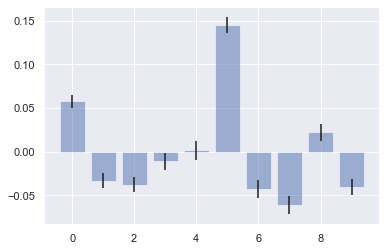

In [241]:

plt.bar(x=res_df.index,height=res_df['coeff'],yerr=res_df['std_err'], alpha=.5)